In [139]:
# Import libaries: 

#Data manipulation
import pandas as pd
import numpy as np

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection

# Change the parameters
plt.rcParams.update({'mathtext.default':  'regular' })
sns.set(context='paper',style="whitegrid",font='Times New Roman',font_scale=1.2)

## Visualization of the experimental data

In [251]:
# The name of the files are given by these numbers
numbers = ['9','12','15','18','21','24']

# The known angles of the experiment are in this list
angles =[5,15,25,35,45,55]

# Function that later will be applied into the dataframe
def ang(x):
    x = str(x)
    return f'Angle: '+ x

# Generate a list of dataframes (looking foward to concatenate)
dataframes=[]
# A for loop to generate the dataframes from files
for i,let in enumerate(numbers):
    #Read files
    with open(f'./SiO {let}(Si).xy', 'r') as fout:
        value=fout.read()
    #Clean data a little
    vals = value.split('#')[-1].split('\n')
    while '' in vals:
        vals.remove('')
    #Generate the dataframe
    data = pd.DataFrame([row.split('  ') for row in vals], columns=[f'bind',f'exp']).astype('float')
    #Add a new column to indicate that there is an angle dependence
    data['Angle']=90-angles[i]*np.ones(data.shape[0])
    data['Angle']=data['Angle'].apply(ang)
    #Integrate to the list
    dataframes.append(data)
    
#Generate a huge dataframe with all the information
all_data = pd.concat(dataframes, axis=0)

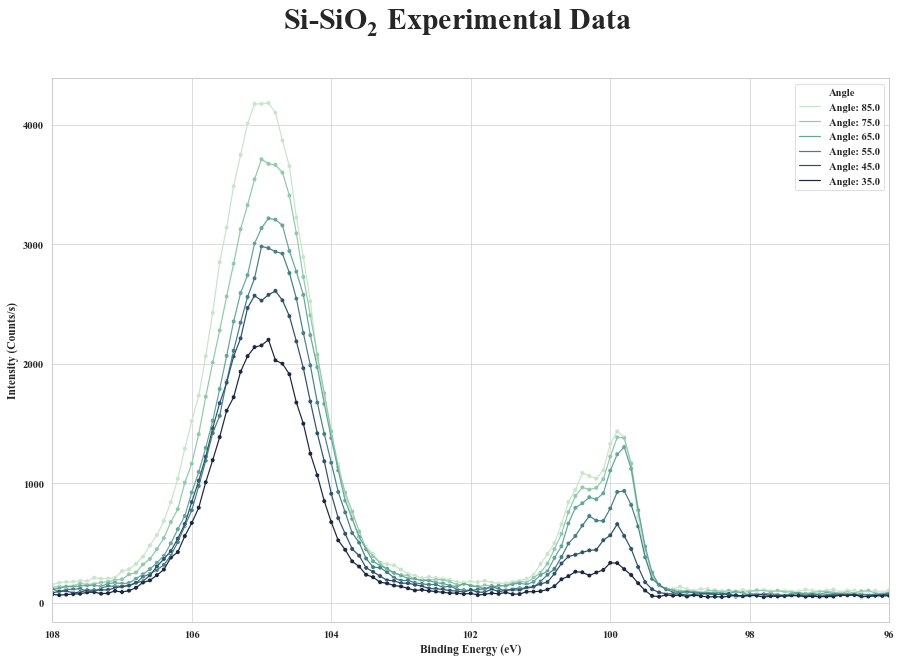

In [252]:
# Select a palette: 
COLORS=[(0,0,1,.2),(0,0,1,.3),(0,0,1,.4),(0,0,1,.5),(0,0,1,.6),(0,0,1,.7)]
COLORS2=sns.cubehelix_palette(rot=-.4)

# Plot with seaborn lineplot, add a hue. 

plt.figure(figsize=(15,10))
sns.scatterplot(all_data.bind, all_data.exp, hue=all_data.Angle, palette=COLORS2,legend=False)
sns.lineplot(all_data.bind, all_data.exp, hue=all_data.Angle, palette=COLORS2)
plt.xlim(108, 96)

plt.xlabel('Binding Energy (eV)')
plt.ylabel('Intensity (Counts/s)')
plt.suptitle('Si-SiO$_2$ Experimental Data', fontsize=30)
plt.grid(which='both', c='#D4D4D4')
plt.show()

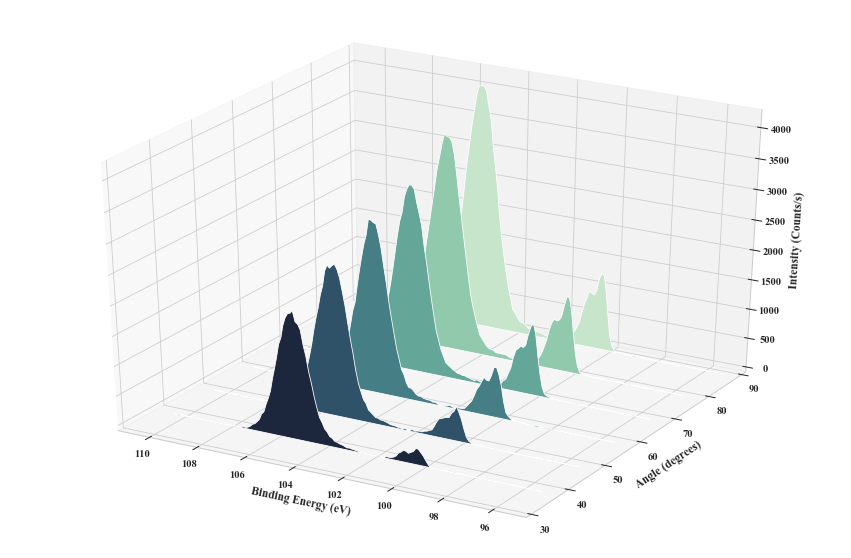

In [142]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')


# Add vertices for a polygon figure which is a list of touples (X,y)
verts2=[]
for data in dataframes:
    value_verts=[]
    for i in range(len(list(data.exp))):
        z=(float(list(data.bind)[i]),float(list(data.exp)[i]))
        value_verts.append(z)
    verts2.append(value_verts)

# Generate a collection
poly = PolyCollection(verts2,facecolors=COLORS2)


# Determine the positions on z axis. 
zs=90-np.array(angles)

# Plot
ax.add_collection3d(poly, zs=zs, zdir='y')
ax.set_xlabel('Binding Energy (eV)')
ax.set_xlim3d(111, 95)
ax.set_ylabel('Angle (degrees)')
ax.set_ylim3d(30, 90)
ax.set_zlabel('Intensity (Counts/s)')
ax.set_zlim3d(0, 4200)
plt.show()

## Visualization of data after processing in Aanalyzer

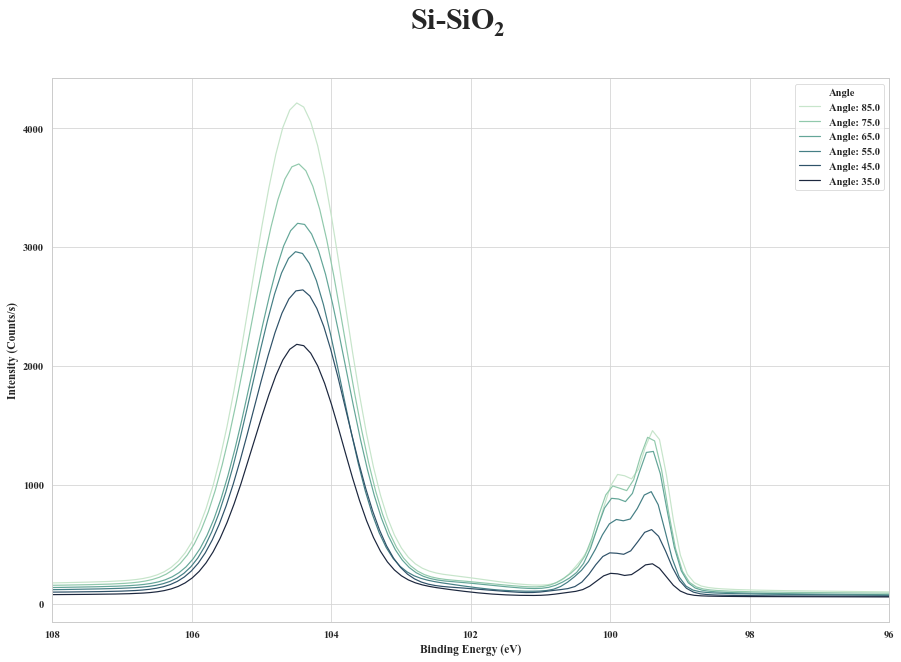

In [253]:
# List of dataframes with fit curves from the obtained parameters
cal_dataframes = []
for i,let in enumerate(numbers):
    cal_data=pd.read_csv(f'./Angulaes_sin_ajuste/SiO {let}(Si).fit', sep='\t')[['x','yCal']].astype('float')
    cal_data['Angle'] = 90-angles[i]*np.ones(cal_data.shape[0])
    cal_data['Angle'] = cal_data['Angle'].apply(ang)
    cal_dataframes.append(cal_data)

# Concatenate the dataframes
all_cal_data = pd.concat(cal_dataframes, axis=0)

#Generate a visualization
plt.figure(figsize=(15,10))
sns.lineplot(all_cal_data.x, all_cal_data.yCal, hue=all_cal_data.Angle, palette=COLORS2)
plt.xlim(108, 96)
plt.xlabel('Binding Energy (eV)')
plt.ylabel('Intensity (Counts/s)')
plt.suptitle('Si-SiO$_2$', fontsize=30)
plt.grid(which='both', c='#D4D4D4')
plt.show()

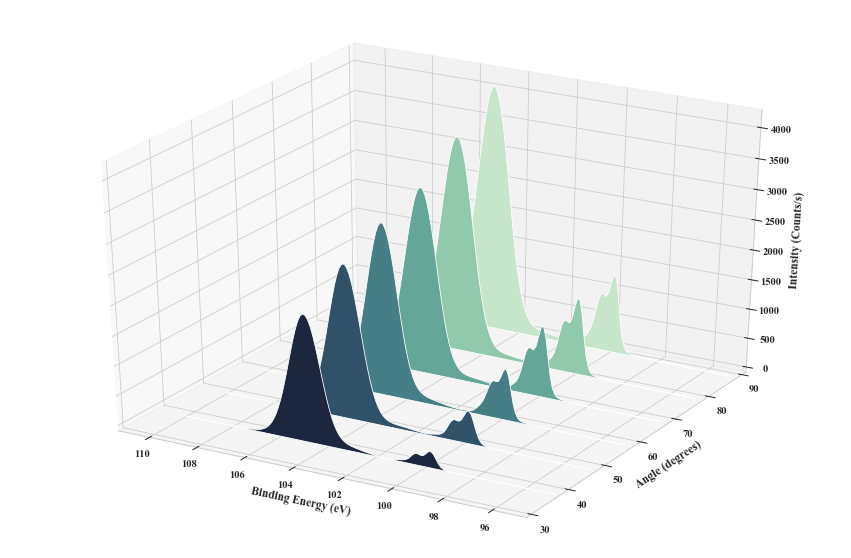

In [21]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')

verts3=[]
for data in cal_dataframes:
    value_verts=[]
    for i in range(len(list(data.x))):
        z=(float(list(data.x)[i]),float(list(data.yCal)[i]))
        value_verts.append(z)
    verts3.append(value_verts)
    
zs=90-np.array(angles)
    
poly = PolyCollection(verts3,facecolors=COLORS2)
ax.add_collection3d(poly, zs=zs, zdir='y')
ax.set_xlabel('Binding Energy (eV)')
ax.set_xlim3d(111, 95)
ax.set_ylabel('Angle (degrees)')
ax.set_ylim3d(30, 90)
ax.set_zlabel('Intensity (Counts/s)')
ax.set_zlim3d(0, 4200)
plt.show()

# Results table and area comparison

In [284]:
# Obtain table of results to generate dataframes:

table_areas = pd.read_csv('./Angulaes_sin_ajuste/areaTable.tbl', sep='\t')

cols = list(filter(lambda x: 'Unnamed' not in x, list(table_areas.columns)))
table_areas = table_areas[cols].head(6)
table_areas.columns = ['angle','x','p0','p1','p2','p3','tot_area']

# Knowing how the data was processed is necessary to obtain this information
table_areas['p_si']=table_areas.p0+table_areas.p2
table_areas['p_si_o2']=table_areas.p1+table_areas.p3
table_areas['R']=table_areas.p_si_o2/table_areas.p_si
table_areas

,angle,x,p0,p1,p2,p3,tot_area,p_si,p_si_o2,R
0,5.0,85.0,1039.40,6842.1,276.070,132.460,8290.011,1315.470,6974.560,5.301953
1,15.0,75.0,1094.80,6061.3,172.390,102.510,7431.037,1267.190,6163.810,4.864156
2,25.0,65.0,1019.30,5171.4,138.050,100.980,6429.677,1157.350,5272.380,4.555562
3,35.0,55.0,671.46,4609.1,180.960,105.350,5566.844,852.420,4714.450,5.530666
4,45.0,45.0,502.86,4280.2,55.238,79.527,4917.870,558.098,4359.727,7.811759
5,55.0,35.0,232.20,3411.3,40.984,90.664,3775.156,273.184,3501.964,12.819067


Text(0.5, 1.0, 'Area for Si and SiO$_2$')

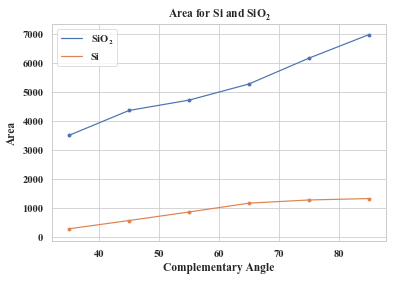

In [153]:
# Plotting the area of the peaks with respect to the complementary angle

sns.lineplot(table_areas.x,table_areas.p_si_o2,label='SiO$_2$')
sns.scatterplot(table_areas.x,table_areas.p_si_o2)

sns.lineplot(table_areas.x,table_areas.p_si,label='Si')
sns.scatterplot(table_areas.x,table_areas.p_si)


plt.xlabel('Complementary Angle')
plt.ylabel('Area')
plt.title('Area for Si and SiO$_2$')

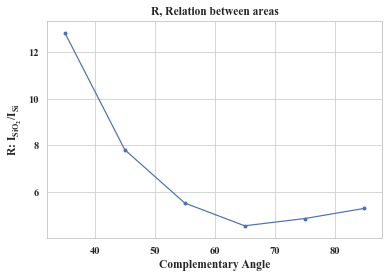

In [285]:
# Obtaining the relation between the areas 

sns.lineplot(table_areas.x,table_areas.R)
sns.scatterplot(table_areas.x,table_areas.R)
plt.xlabel('Complementary Angle')
plt.ylabel('R: $I_{SiO_2}/I_{Si}$')
plt.title('R, Relation between areas')
plt.show()

## Analysis of the infinite samples: Si and SiO2

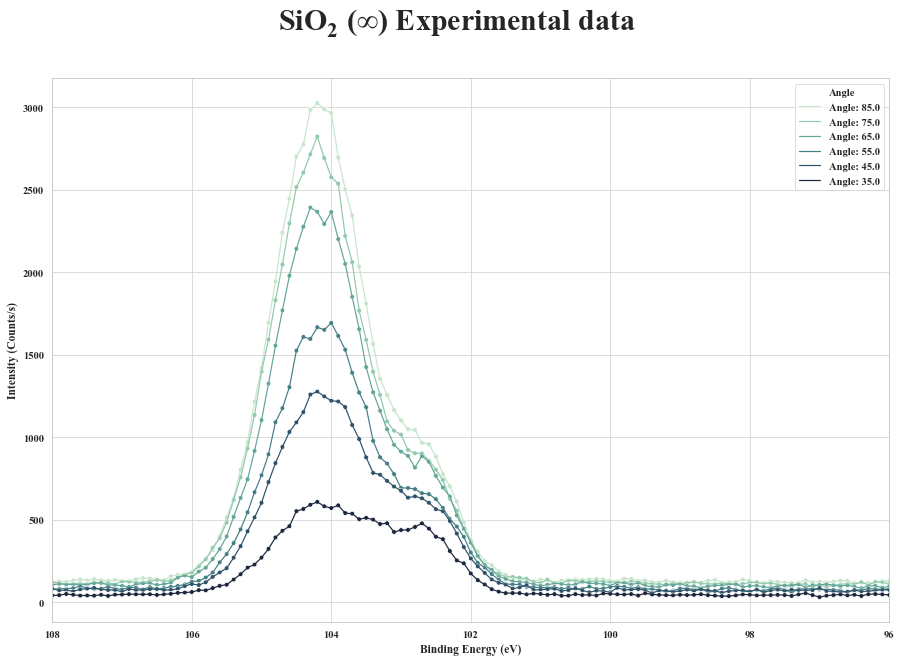

In [270]:
# The name of the files are given by these numbers
numbers = ['9','12','15','18','21','24']

# The known angles of the experiment are in this list
angles =[5,15,25,35,45,55]

# Function that later will be applied into the dataframe
def ang(x):
    x = str(x)
    return f'Angle: '+ x

# Generate a list of dataframes (looking foward to concatenate)
dataframes=[]
# A for loop to generate the dataframes from files
for i,let in enumerate(numbers):
    #Read files
    with open(f'./Silicio2p/OxidoInfinito/OxidoInfinito_single {let}.xy', 'r') as fout:
        value=fout.read()
    #Clean data a little
    vals = value.split('#')[-1].split('\n')
    while '' in vals:
        vals.remove('')
    #Generate the dataframe
    data = pd.DataFrame([row.split('  ') for row in vals], columns=[f'bind',f'exp']).astype('float')
    #Add a new column to indicate that there is an angle dependence
    data['Angle']=90-angles[i]*np.ones(data.shape[0])
    data['Angle']=data['Angle'].apply(ang)
    #Integrate to the list
    dataframes.append(data)
    
#Generate a huge dataframe with all the information
all_data = pd.concat(dataframes, axis=0)


# Plot with seaborn lineplot, add a hue. 

plt.figure(figsize=(15,10))
sns.scatterplot(all_data.bind, all_data.exp, hue=all_data.Angle, palette=COLORS2,legend=False)
sns.lineplot(all_data.bind, all_data.exp, hue=all_data.Angle, palette=COLORS2)
plt.xlim(108, 96)

plt.xlabel('Binding Energy (eV)')
plt.ylabel('Intensity (Counts/s)')
plt.suptitle('SiO$_2$ ($\\infty$) Experimental data', fontsize=30)
plt.grid(which='both', c='#D4D4D4')
plt.show()

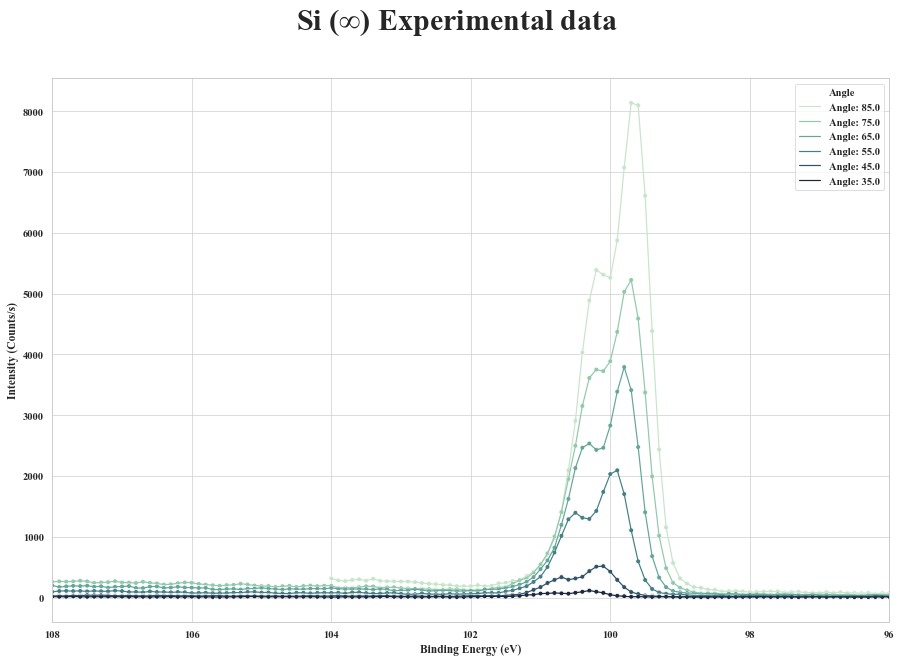

In [271]:
# The name of the files are given by these numbers
numbers = ['9','12','15','18','21','24']

# The known angles of the experiment are in this list
angles =[5,15,25,35,45,55]

# Function that later will be applied into the dataframe
def ang(x):
    x = str(x)
    return f'Angle: '+ x

# Generate a list of dataframes (looking foward to concatenate)
dataframes=[]
# A for loop to generate the dataframes from files
for i,let in enumerate(angles):
    #Read files
    #with open(f'./Silicio2p/SilicioInfinito/Si2p {let}.txt', 'r') as fout:
    #    value=fout.read()
    #Generate the dataframe
    
    #data = pd.DataFrame(value, columns=[f'bind',f'exp']).astype('float')
    data=pd.read_csv(f'./Silicio2p/SilicioInfinito/Si2p {let}.txt',sep='\s+', header=None, dtype=float)
    data.columns=[f'bind',f'exp']
    #Add a new column to indicate that there is an angle dependence
    data['Angle']=90-angles[i]*np.ones(data.shape[0])
    data['Angle']=data['Angle'].apply(ang)
    #Integrate to the list
    dataframes.append(data)
    
#Generate a huge dataframe with all the information
all_data = pd.concat(dataframes, axis=0)


# Plot with seaborn lineplot, add a hue. 

plt.figure(figsize=(15,10))
sns.scatterplot(all_data.bind, all_data.exp, hue=all_data.Angle, palette=COLORS2,legend=False)
sns.lineplot(all_data.bind, all_data.exp, hue=all_data.Angle, palette=COLORS2)
plt.xlim(108, 96)

plt.xlabel('Binding Energy (eV)')
plt.ylabel('Intensity (Counts/s)')
plt.suptitle('Si ($\\infty$) Experimental data', fontsize=30)
plt.grid(which='both', c='#D4D4D4')
plt.show()

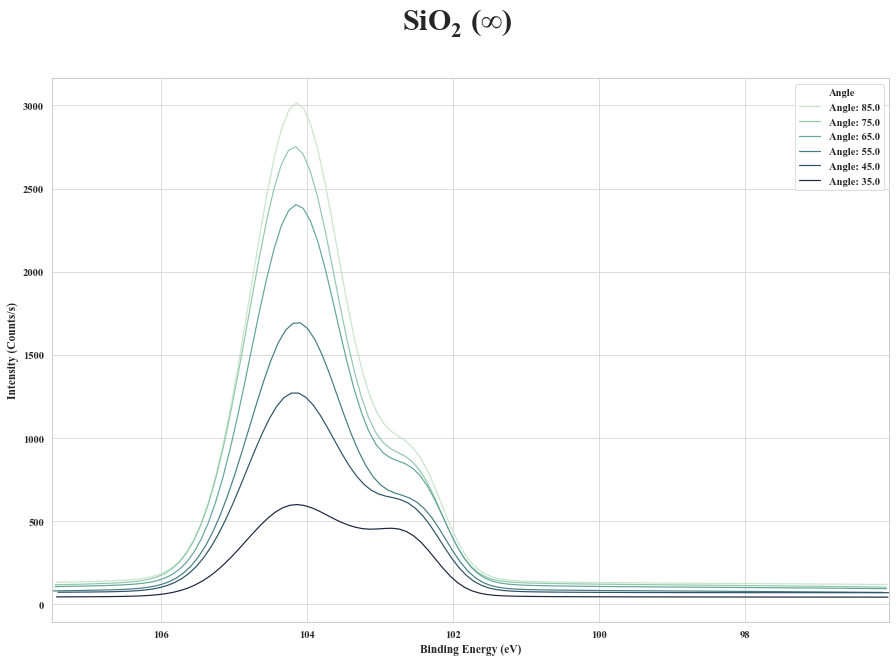

In [272]:
cal_dataframes = []
for i,let in enumerate(numbers):
    cal_data=pd.read_csv(f'./Silicio2p/OxidoInfinito/OxidoInfinito_single {let}.fit', sep='\t')[['x','yCal']].astype('float')
    cal_data['Angle'] = 90-angles[i]*np.ones(cal_data.shape[0])
    cal_data['Angle'] = cal_data['Angle'].apply(ang)
    cal_dataframes.append(cal_data)
all_cal_data = pd.concat(cal_dataframes, axis=0)
plt.figure(figsize=(15,10))
sns.lineplot(all_cal_data.x, all_cal_data.yCal, hue=all_cal_data.Angle, palette=COLORS2)
plt.xlim(max(all_cal_data.x), min(all_cal_data.x))

plt.xlabel('Binding Energy (eV)')
plt.ylabel('Intensity (Counts/s)')
plt.suptitle('SiO$_2$ ($\\infty$) ', fontsize=30)
plt.grid(which='both', c='#D4D4D4')
plt.show()

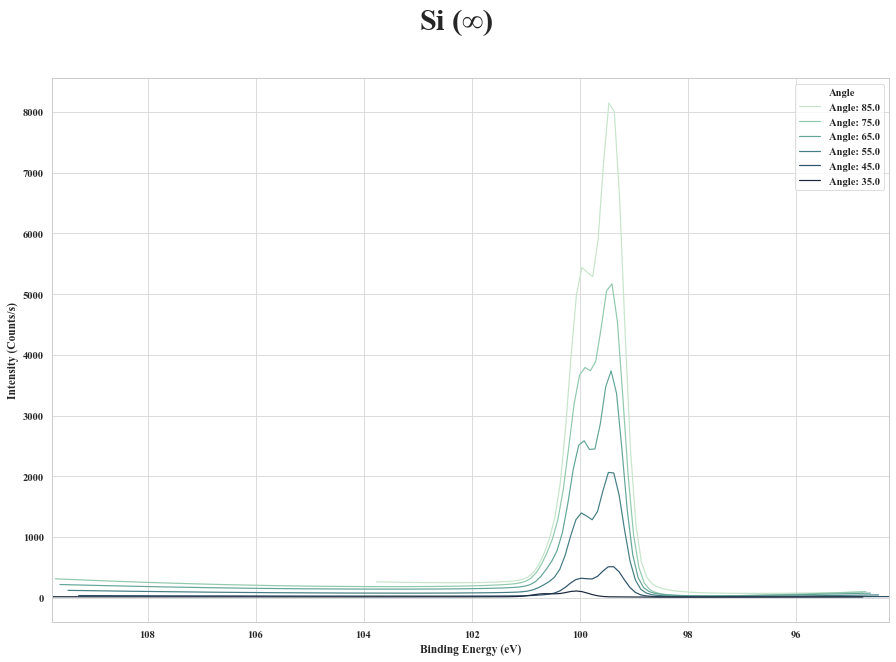

In [273]:
cal_dataframes = []
for i,let in enumerate(angles):
    cal_data=pd.read_csv(f'./Silicio2p/SilicioInfinito/Si2p {let}.fit', sep='\t')[['x','yCal']].astype('float')
    cal_data['Angle'] = 90-angles[i]*np.ones(cal_data.shape[0])
    cal_data['Angle'] = cal_data['Angle'].apply(ang)
    cal_dataframes.append(cal_data)
all_cal_data = pd.concat(cal_dataframes, axis=0)
plt.figure(figsize=(15,10))
sns.lineplot(all_cal_data.x, all_cal_data.yCal, hue=all_cal_data.Angle, palette=COLORS2)
plt.xlim(max(all_cal_data.x), min(all_cal_data.x))

plt.xlabel('Binding Energy (eV)')
plt.ylabel('Intensity (Counts/s)')
plt.suptitle('Si ($\\infty$) ', fontsize=30)
plt.grid(which='both', c='#D4D4D4')
plt.show()

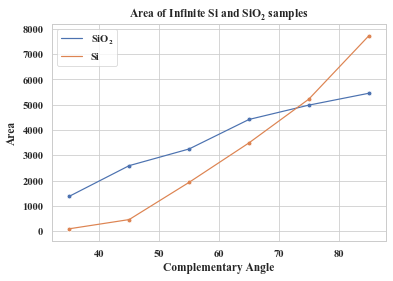

In [274]:
table_areas_ox_inf = pd.read_csv('./Silicio2p/OxidoInfinito/areaTable_oxido_infinito.tbl', sep='\t')

cols = list(filter(lambda x: 'Unnamed' not in x, list(table_areas_ox_inf.columns)))
table_areas_ox_inf = table_areas_ox_inf[cols].head(6)
table_areas_ox_inf.columns = ['angle','x','p0','p1','tot_area']
table_areas_ox_inf['p_si']=table_areas_ox_inf.p0+table_areas_ox_inf.p1
table_areas_ox_inf.x=[85,75,65,55,45,35]

table_areas_si_inf = pd.read_csv('./Silicio2p/SilicioInfinito/areaTable_silicio_infinito.tbl', sep='\t')

cols = list(filter(lambda x: 'Unnamed' not in x, list(table_areas_si_inf.columns)))
table_areas_si_inf = table_areas_si_inf[cols].head(6)
table_areas_si_inf.columns = ['angle','x','p0','p1','tot_area']
table_areas_si_inf['p_si']=table_areas_si_inf.p0+table_areas_si_inf.p1
table_areas_si_inf


sns.lineplot(table_areas_ox_inf.x,table_areas_ox_inf.tot_area,label='SiO$_2$')
sns.scatterplot(table_areas_ox_inf.x,table_areas_ox_inf.tot_area)



sns.lineplot(table_areas_si_inf.x,table_areas_si_inf.tot_area, label='Si')
sns.scatterplot(table_areas_si_inf.x,table_areas_si_inf.tot_area)

plt.xlabel('Complementary Angle')
plt.ylabel('Area')
plt.title('Area of Infinite Si and SiO$_2$ samples')
plt.show()

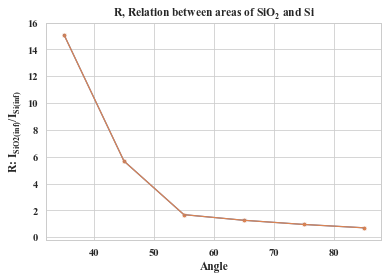

In [276]:
sns.scatterplot(table_areas_si_inf.x,table_areas_ox_inf.tot_area/table_areas_si_inf.tot_area)
sns.scatterplot(table_areas_si_inf.x,table_areas_ox_inf.tot_area/table_areas_si_inf.tot_area)

sns.lineplot(table_areas_si_inf.x,table_areas_ox_inf.tot_area/table_areas_si_inf.tot_area)
sns.lineplot(table_areas_si_inf.x,table_areas_ox_inf.tot_area/table_areas_si_inf.tot_area)
plt.xlabel('Angle')
plt.ylabel('R: $I_{SiO2 (inf)} / I_{Si (inf)}$')
plt.title('R, Relation between areas of SiO$_2$ and Si ')
plt.show()

In [307]:
#Create table with useful data
end_table = pd.DataFrame([table_areas_si_inf.x,
                          pd.Series(angles),
                          table_areas.p_si_o2,
                          table_areas.p_si,
                          table_areas_ox_inf.tot_area,
                          table_areas_si_inf.tot_area,
                          table_areas_ox_inf.tot_area/table_areas_si_inf.tot_area,
                          table_areas.R])
end_table = end_table.T
end_table.columns = ['angle_c','angle','sio2_exp','si_exp','sio2_inf','si_inf','K', 'R']
end_table['ln 1+R/K']=np.log(1+end_table.R/end_table.K)
end_table['rad_c']=(end_table.angle_c)/180*np.pi
end_table['rad']=(end_table.angle)/180*np.pi
end_table['1/sin']=1/np.sin(end_table.rad)
end_table

,angle_c,angle,sio2_exp,si_exp,sio2_inf,si_inf,K,R,ln 1+R/K,rad_c,rad,1/sin
0,85.0,5.0,6974.560,1315.470,5454.482,7728.42100,0.705769,5.301953,2.141513,1.483530,0.087266,11.473713
1,75.0,15.0,6163.810,1267.190,4985.648,5224.95800,0.954199,4.864156,1.807901,1.308997,0.261799,3.863703
2,65.0,25.0,5272.380,1157.350,4417.939,3490.72900,1.265621,4.555562,1.525941,1.134464,0.436332,2.366202
3,55.0,35.0,4714.450,852.420,3249.412,1928.38700,1.685041,5.530666,1.454470,0.959931,0.610865,1.743447
4,45.0,45.0,4359.727,558.098,2589.815,455.90530,5.680599,7.811759,0.865067,0.785398,0.785398,1.414214
5,35.0,55.0,3501.964,273.184,1375.644,91.13596,15.094415,12.819067,0.614785,0.610865,0.959931,1.220775


In [194]:
from scipy import stats

In [314]:
x0=end_table['1/sin'][0:]
y0=end_table['ln 1+R/K'][0:]
slope0, intercept0, r_value, p_value, std_err = stats.linregress(x0,y0)

x1=end_table['1/sin'][1:]
y1=end_table['ln 1+R/K'][1:]
slope1, intercept1, r_value, p_value, std_err = stats.linregress(x1,y1)

x2=end_table['1/sin'][2:]
y2=end_table['ln 1+R/K'][2:]
slope2, intercept2, r_value, p_value, std_err = stats.linregress(x2,y2)

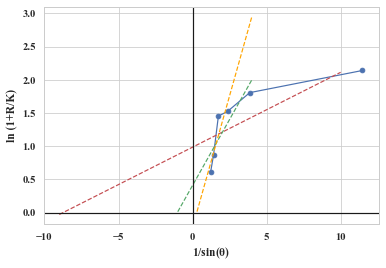

In [325]:
plt.plot(end_table['1/sin'],end_table['ln 1+R/K'])
plt.scatter(end_table['1/sin'],end_table['ln 1+R/K'])

z0=np.linspace(-9,10)
z1=np.linspace(-1,4)
z2=np.linspace(.3,4)

a=slope0*z0+intercept0
b=slope1*z1+intercept1
c=slope2*z2+intercept2

plt.plot(z0,a,'--', c='r')
plt.plot(z1,b,'--', c='g')
plt.plot(z2,c,'--', c='orange')


plt.grid(True, which='both')
plt.xlabel('1/sin($\\theta$)')
plt.ylabel('ln (1+R/K)')

plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

In [321]:
plt.plot(end_table['1/sin'],end_table['ln 1+R/K'])
plt.scatter(end_table['1/sin'],end_table['ln 1+R/K'])


plt.plot(z0,a,'--')
plt.plot(z1,b,'--')
plt.plot(z2,c,'--')


plt.grid(True, which='both')
plt.xlabel('1/sin($\\theta$)')
plt.ylabel('ln (1+R/K)')

plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

(4.056930318266427, 14.29519151041281, 28.545035088135492)